# DiffLinker only: Get output smiles from generated sdf files

In [1]:
import sys
import os

import pandas as pd
from rdkit import Chem, RDLogger, DataStructs, RDConfig
from rdkit.Chem import PandasTools, QED
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

import data_postprocessing

Cannot find license file.
 The license files (or license server system network addresses) attempted are 
listed below.  Use LM_LICENSE_FILE to use a different license file,
 or contact your software provider for a license file.
Feature:       PYMOL_MAIN
Filename:      /Library/Application Support/Schrodinger/licenses
License path:  /Library/Application Support/Schrodinger/licenses:
FlexNet Licensing error:-1,359.  System Error: 2 "No such file or directory"


In [2]:
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

## Load data

### generated data

In [3]:
all_results_path = '/Users/rebeccaneeser/Documents/data/protacs/preprint_data/difflinker_results'
PDB_id = '7JTO'
method = 'difflinker'
results_path = os.path.join(all_results_path, PDB_id)

In [4]:
input_df = pd.read_csv(os.path.join(all_results_path, "difflinker_aug_fragments.csv"), index_col=0)
# rename anchor_ev and warhead_ev to ev_anchor and ev_warhead
input_df.rename(columns={'anchor_ev': 'ev_anchor', 'warhead_ev': 'ev_warhead'}, inplace=True)
input_df.head()

,pose_id,smiles,anchor,warhead,linker_size,frags_size,frags,miniprotac,wrh_trunc_w_attch_smiles,anc_trunc_w_attch_smiles,anchors,trunc_anchors,ev_anchor,ev_warhead
lig_id,,,,,,,,,,,,,,
MS33,7JTO,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,14,12,C1CNCCN1.CC(C)NC=O,CC(C)NC(=O)CCCCCCCCCC(=O)NCCN1CCNCC1,*N1CCNCC1,*C(=O)NC(C)C,"29,45","4,6",Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...
dBET6,6BOY,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCC...,O=C1CC[C@H](N2C(=O)c3cccc(O)c3C2=O)C(=O)N1,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(N)=O)c1...,12,47,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(N)=O)c1...,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCC...,*NC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2c(sc(C)c2C)-...,*Oc1cccc2c1C(=O)N([C@H]1CCC(=O)NC1=O)C2=O,"2,8","2,8",O=C1CC[C@H](N2C(=O)c3cccc(O[*:1])c3C2=O)C(=O)N1,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)N[*:...
PROTAC1,6HAY,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Nc1nnc(-c2ccccc2O)cc1N1CCNCC1,8,57,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,*N1CCN(c2cc(-c3ccccc3O)nnc2N)CC1,*Oc1cc(-c2scnc2C)ccc1CNC(=O)[C@@H]1C[C@@H](O)C...,"35,44","35,36",Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Nc1nnc(-c2ccccc2O)cc1N1CCN([*:2])CC1
ACBI1,7S4E,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Nc1nnc(-c2ccccc2O)cc1N1CCNCC1,10,57,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,*N1CCN(c2cc(-c3ccccc3O)nnc2N)CC1,*Oc1cc(-c2scnc2C)ccc1CNC(=O)[C@@H]1C[C@@H](O)C...,"15,14","15,14",Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Nc1nnc(-c2ccccc2O)cc1N1CCN([*:2])CC1
7Q2J,7Q2J,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3ccccc3)cc2NC(=O)c2c[nH]c(=O)cc...,7,12,CC(C)NC=O.c1ccccc1,CC(C)NC(=O)CCCCNC(=O)c1ccccc1,*c1ccccc1,*C(=O)NC(C)C,"41,35","6,5",Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3ccc([*:2])cc3)cc2NC(=O)c2c[nH]...


### original data from xtal poses

In [5]:
xtal_folder = 'data/xtal_poses'
pdb_folder = os.path.join(xtal_folder, PDB_id)
df_ori = pd.read_csv(os.path.join(xtal_folder, 'protac_systems_012323_linkgen.csv'))
df_ori = df_ori[df_ori['PDB'] == PDB_id]
df_ori

,PDB,protac_smiles,linker_smiles,linker_ext_smiles,anchor_smiles,warhead_smiles,POI,E3,protacdb_ID,name,frag_combined,linker_ev,anchor_ev,warhead_ev
0,7JTO,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CCCCCCCCCC(=O)NCC,NC(=O)CCCCCCCCCC(=O)NCCN1CCNCC1,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,WDR5,VHL,3245.0,MS33,*C(=O)N[C@H](C(=O)N1C[C@H](O)C[C@H]1C(=O)NCc1c...,O=C(CCCCCCCCC[*:1])NCC[*:2],Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...


### reference data (PROTAC-DB)

In [6]:
df_ref = pd.read_csv('data/protacdb_extended_linkers.csv')
df_ref.head()

,protac_id,Uniprot,Target,E3 ligase,PDB,Name,protac_smiles,anchor_smiles,warhead_smiles,linker_smiles,linker_id,Smiles,InChI,ext_linker_smiles
0,1,Q9NPI1;Q9H8M2,BRD7;BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,*C(=O)N[C@H](C(=O)N1C[C@@H](C[C@H]1C(=O)NCC2=C...,*N1CCN(CC1)CC2=C(C=C(C=C2OC)C3=CN(C(=O)C4=C3C=...,CCOCCOC,1.0,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,NC(=O)COCCOCCN1CCNCC1
1,2,Q9NPI1;Q9H8M2,BRD7;BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,*C(=O)N[C@H](C(=O)N1C[C@@H](C[C@H]1C(=O)NCC2=C...,*N1CCN(CC1)CC2=C(C=C(C=C2OC)C3=CN(C(=O)C4=C3C=...,CCOCCOCCOCCOC,2.0,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NC(=O)COCCOCCOCCOCCN1CCNCC1
2,3,Q9H8M2,BRD9,CRBN,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,*NC1=CC=CC2=C1C(=O)N(C2=O)C3CCC(=O)NC3=O,*N1CCN(CC1)CC2=C(C=C(C=C2OC)C3=CN(C(=O)C4=C3C=...,CCNC(=O)COCCOCC,3.0,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,InChI=1S/C43H50N8O10/c1-48-24-31(28-9-10-44-23...,O=C(COCCOCCN1CCNCC1)NCCNc1cccc2c1C(=O)NC2=O
3,4,Q9H8M2,BRD9,CRBN,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,*NC1=CC=CC2=C1C(=O)N(C2=O)C3CCC(=O)NC3=O,*N1CCN(CC1)CC2=C(C=C(C=C2OC)C3=CN(C(=O)C4=C3C=...,CCNC(=O)COCCOCCOCCOCC,4.0,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,InChI=1S/C47H58N8O12/c1-52-28-35(32-9-10-48-27...,O=C(COCCOCCOCCOCCN1CCNCC1)NCCNc1cccc2c1C(=O)NC2=O
4,5,Q9NPI1;Q9H8M2,BRD7;BRD9,DCAF15,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,*NCC1=CC=C(C=C1)S(=O)(=O)NC2=CC=CC3=C2NC=C3Cl,*N1CCN(CC1)CC2=C(C=C(C=C2OC)C3=CN(C(=O)C4=C3C=...,CCOCCOCC=O,5.0,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,InChI=1S/C43H48ClN7O8S/c1-49-26-35(32-11-12-45...,CNC(=O)COCCOCCN1CCNCC1


In [7]:
ref_ext_linker_smiles = df_ref['ext_linker_smiles'].unique().tolist()
ref_ext_linker_smiles = [Chem.CanonSmiles(smi) for smi in ref_ext_linker_smiles]
ref_ext_linker_smiles = list(set(ref_ext_linker_smiles))
ref_ext_linker_smiles_noniso = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), isomericSmiles=False) for smi in ref_ext_linker_smiles]
ref_linker_smiles = df_ref['linker_smiles'].unique().tolist()
# drop nan
ref_linker_smiles = [smi for smi in ref_linker_smiles if type(smi) == str]
ref_linker_smiles = [Chem.CanonSmiles(smi) for smi in ref_linker_smiles]
ref_linker_smiles = list(set(ref_linker_smiles))
ref_linker_smiles_noniso = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), isomericSmiles=False) for smi in ref_linker_smiles]
ref_protac_smiles = df_ref['protac_smiles'].unique().tolist()
ref_protac_smiles = [Chem.CanonSmiles(smi) for smi in ref_protac_smiles]
ref_protac_smiles = list(set(ref_protac_smiles))
ref_protac_smiles_noniso = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), isomericSmiles=False) for smi in ref_protac_smiles]

## Format output

In [8]:
data_postprocessing.add_conformers(results_path)

10026
ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count

ReadMOLFile-Error: bad atom count



In [9]:
input_frag = Chem.MolFromSmiles(input_df[input_df['pose_id']== PDB_id].frags.item())
data_postprocessing.align_ligand(results_path, input_frag)

Number of errors:  76


In [10]:
gen_data_df = data_postprocessing.get_generated_data_df(input_df, results_path, PDB_id)
gen_data_df.head()

100%|██████████| 5024/5024 [00:30<00:00, 165.85it/s]


validity 0.0005971337579617764


,ID,reference,lig_id,protac_smiles,anchor_smiles,warhead_smiles,anchor_ev,warhead_ev,gen_smiles,gen_filename,frags,wrh_trunc_w_attch,anc_trunc_w_attch,linker_len
0,7JTO_difflinker_678,7JTO,MS33,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...,CC(C)NC(=O)COCCOCOC(=O)CCCCCN1CCNCC1,output_48_7JTO__MS33_0_len14.sdf,[H]C(=O)N([H])C([H])(C([H])([H])[H])C([H])([H]...,*N1CCNCC1,*C(=O)NC(C)C,14
1,7JTO_difflinker_1584,7JTO,MS33,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...,CC(C)NC(=O)CCCCCC(=O)N[C@H](C)CCCCN1CCNCC1,output_2613_7JTO__MS33_0_len14.sdf,[H]C(=O)N([H])C([H])(C([H])([H])[H])C([H])([H]...,*N1CCNCC1,*C(=O)NC(C)C,14
2,7JTO_difflinker_3051,7JTO,MS33,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...,CC(C)NC(=O)CCOCCC[C@@H]1CCC[C@H]1CC(=O)N1CCNCC1,output_3442_7JTO__MS33_0_len14.sdf,[H]C(=O)N([H])C([H])(C([H])([H])[H])C([H])([H]...,*N1CCNCC1,*C(=O)NC(C)C,14


In [11]:
gen_data_df.to_csv(os.path.join(results_path, f'{PDB_id}_{method}_valid_all.csv'))

In [12]:
# only keep those with ID below 5000 (that's how many are sampled by the other methods)
max_id = 4999
gen_data_df['sampling_num'] = gen_data_df['ID'].apply(lambda x: int(x.split('_')[-1]))
df_valid = gen_data_df[gen_data_df['sampling_num'] <= max_id]
validity = len(df_valid)/5000*100
print(f'validity: {validity:.4f}%')

validity: 0.0600%


In [13]:
PandasTools.AddMoleculeColumnToFrame(df_valid, smilesCol='protac_smiles', molCol='ROMol') 

### get linker and extended linker fragment

,ID,reference,lig_id,protac_smiles,anchor_smiles,warhead_smiles,anchor_ev,warhead_ev,gen_smiles,gen_filename,frags,wrh_trunc_w_attch,anc_trunc_w_attch,linker_len,sampling_num,ROMol
0,7JTO_difflinker_678,7JTO,MS33,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...,CC(C)NC(=O)COCCOCOC(=O)CCCCCN1CCNCC1,output_48_7JTO__MS33_0_len14.sdf,[H]C(=O)N([H])C([H])(C([H])([H])[H])C([H])([H]...,*N1CCNCC1,*C(=O)NC(C)C,14,678,
1,7JTO_difflinker_1584,7JTO,MS33,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...,CC(C)NC(=O)CCCCCC(=O)N[C@H](C)CCCCN1CCNCC1,output_2613_7JTO__MS33_0_len14.sdf,[H]C(=O)N([H])C([H])(C([H])([H])[H])C([H])([H]...,*N1CCNCC1,*C(=O)NC(C)C,14,1584,
2,7JTO_difflinker_3051,7JTO,MS33,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCNCC4)c3)cc2NC(=O)C2=...,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,CN1CCN(c2ccc(-c3cccc(CN4CCN([*:2])CC4)c3)cc2NC...,CC(C)NC(=O)CCOCCC[C@@H]1CCC[C@H]1CC(=O)N1CCNCC1,output_3442_7JTO__MS33_0_len14.sdf,[H]C(=O)N([H])C([H])(C([H])([H])[H])C([H])([H]...,*N1CCNCC1,*C(=O)NC(C)C,14,3051,

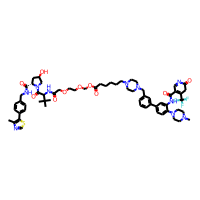
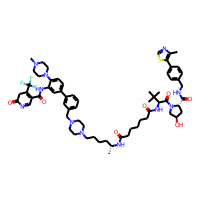
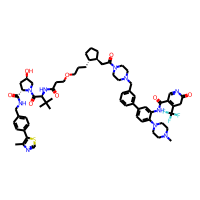

In [14]:
df_valid

In [15]:
df_valid.loc[:,'linker_mol'] = df_valid.apply(lambda x: data_postprocessing.get_linker_new(x.ROMol, x.warhead_smiles, x.anchor_smiles), axis=1)
df_valid.loc[:,'linker_smiles'] = df_valid.linker_mol.apply(Chem.MolToSmiles)

In [16]:
df_valid['POI'] = df_ori.POI.values[0]
df_valid['E3'] = df_ori.E3.values[0]

## Get generative metrics

In [17]:
uniqueness = len(df_valid['protac_smiles'].unique())/len(df_valid)*100
print(f'uniqueness: {uniqueness:.4f}%')

uniqueness: 100.0000%


In [18]:
# novelty to PROTAC-DB (on PROTAC level)
gen_protac_noniso = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), isomericSmiles=False) for smi in df_valid['protac_smiles']]
novelty = len(set(gen_protac_noniso) - set(ref_protac_smiles_noniso))/len(set(set(gen_protac_noniso)))*100
print(f'novelty PROTAC: {novelty:.4f}%')

novelty PROTAC: 100.0000%


In [19]:
# max tanimoto similarity to reference linker
df_valid.loc[:,'fp'] = df_valid.linker_mol.apply(Chem.RDKFingerprint)
ori_linker_mol = Chem.MolFromMolFile(os.path.join(pdb_folder, f'{PDB_id}_fragments',f'{PDB_id}_linker.sdf'))
ori_linker_fp = Chem.RDKFingerprint(ori_linker_mol)
df_valid.loc[:,'tanimoto'] = df_valid.fp.apply(DataStructs.FingerprintSimilarity, args=(ori_linker_fp,))
print(f'max tanimoto similarity to reference linker: {df_valid.tanimoto.max():.4f}')

max tanimoto similarity to reference linker: 0.6316


In [20]:
# check if reference linker is recovered
Chem.MolToSmiles(ori_linker_mol, isomericSmiles=False) in df_valid.linker_smiles.values

False

## Get chemistry metrics

In [21]:
PandasTools.AddMoleculeColumnToFrame(df_valid, 'linker_smiles', 'linker_mol')

In [22]:
# average QED
df_valid['qed_protac'] = df_valid.ROMol.apply(QED.qed)
df_valid['qed_linker'] = df_valid.linker_mol.apply(QED.qed)
print(f'average QED of PROTAC: {df_valid.qed_protac.mean():.4f}')
print(f'average QED of linker: {df_valid.qed_linker.mean():.4f}')

average QED of PROTAC: 0.0445
average QED of linker: 0.4624


In [23]:
# average SA score
df_valid['sa_protac'] = df_valid.ROMol.apply(sascorer.calculateScore)
df_valid['sa_linker'] = df_valid.linker_mol.apply(sascorer.calculateScore)
# df_valid['sa_linker'] = df_valid.linker_smiles.apply(lambda x:sascorer.calculateScore(Chem.MolFromSmiles(x)))
print(f'average SA score of PROTAC: {df_valid.sa_protac.mean():.4f}')
print(f'average SA score of linker: {df_valid.sa_linker.mean():.4f}')

average SA score of PROTAC: 5.6088
average SA score of linker: 2.5030


In [24]:
# PAINS filters (True if has match)
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)
df_valid['PAINS'] = df_valid.ROMol.apply(lambda x: catalog.HasMatch(x))
print(f'number of PAINS: {df_valid.PAINS.sum()}')

number of PAINS: 0


In [25]:
# RA filter
# taken from 3DLinker repo: https://github.com/YinanHuang/3DLinker/blob/b8f5c9207df2d48c6299ea2f7c610b6dcfd6bbf4/analysis/frag_utils.py#L692-L705
def ring_check_for_filter(linker):
    check = True
    # Get linker rings
    ssr = Chem.GetSymmSSSR(linker)
    # Check rings
    for ring in ssr:
        for atom_idx in ring:
            for bond in linker.GetAtomWithIdx(atom_idx).GetBonds():
                if bond.GetBondType() == 2 and bond.GetBeginAtomIdx() in ring and bond.GetEndAtomIdx() in ring:
                    check = False
    return check

In [26]:
# RA filter: True if passes filter
df_valid.loc[:,'ring_arom'] = df_valid.linker_mol.apply(ring_check_for_filter)
print(f'number of RA fails: {len(df_valid) - df_valid.ring_arom.sum()}')

number of RA fails: 0


In [27]:
# num rings
df_valid['num_rings_linker'] = df_valid.linker_mol.apply(Chem.rdMolDescriptors.CalcNumRings)
# num rotatable bonds
df_valid['num_rot_bonds_linker'] = df_valid.linker_mol.apply(Chem.rdMolDescriptors.CalcNumRotatableBonds)
# check if branched
df_valid['branched'] = df_valid.apply(lambda x: data_postprocessing.is_good_linker(x['ROMol'], x['warhead_ev'], x['anchor_ev']), axis=1)

In [28]:
# filter out PAINS (True) and RA fails (False)
df_valid_fil = df_valid[(~df_valid.PAINS) & df_valid.ring_arom]
# ratio that passed filters
print(f'ratio that passed filters: {len(df_valid_fil)/len(df_valid)*100:.4f}%')
print(f'average number of rings in linker: {df_valid.num_rings_linker.mean():.4f}')
print(f'average number of rotatable bonds in linker: {df_valid.num_rot_bonds_linker.mean():.4f}')
print(f'Fraction of branched linkers: {df_valid["branched"].sum()/len(df_valid):.4%}')

ratio that passed filters: 100.0000%
average number of rings in linker: 0.3333
average number of rotatable bonds in linker: 8.0000
Fraction of branched linkers: 33.3333%


## Clean up and save dataframe

In [29]:
df_valid.columns

Index(['ID', 'reference', 'lig_id', 'protac_smiles', 'anchor_smiles',
       'warhead_smiles', 'anchor_ev', 'warhead_ev', 'gen_smiles',
       'gen_filename', 'frags', 'wrh_trunc_w_attch', 'anc_trunc_w_attch',
       'linker_len', 'sampling_num', 'ROMol', 'linker_mol', 'linker_smiles',
       'POI', 'E3', 'fp', 'tanimoto', 'qed_protac', 'qed_linker', 'sa_protac',
       'sa_linker', 'PAINS', 'ring_arom', 'num_rings_linker',
       'num_rot_bonds_linker', 'branched'],
      dtype='object')

In [30]:
output_folder = gen_folder = 'data/generated'
keep_cols = ['ID', 'reference', 'lig_id', 'protac_smiles', 'linker_smiles', 'anchor_smiles', 'warhead_smiles', 'anchor_ev', 'warhead_ev', 'POI', 'E3', 'gen_filename', 'frags','tanimoto', 'qed_linker', 'sa_linker', 'num_rings_linker', 'num_rot_bonds_linker', 'branched', 'PAINS', 'ring_arom']
keep_cols_fil = [col for col in keep_cols if col not in ['PAINS', 'ring_arom']]
df_valid[keep_cols].to_csv(os.path.join(gen_folder, f'{PDB_id}_sampled_{method}_valid.csv'), index=False)

## Visualize outputs

In [31]:
mols = []
for i, row in df_valid_fil.iterrows():
    protac = Chem.MolFromSmiles(row.protac_smiles)
    linker = Chem.MolFromSmiles(row.linker_smiles)
    anchor = Chem.MolFromSmiles(row.anchor_smiles)
    warhead = Chem.MolFromSmiles(row.warhead_smiles)
    mols.append(protac)
    mols.append(linker)
    mols.append(anchor)
    mols.append(warhead)

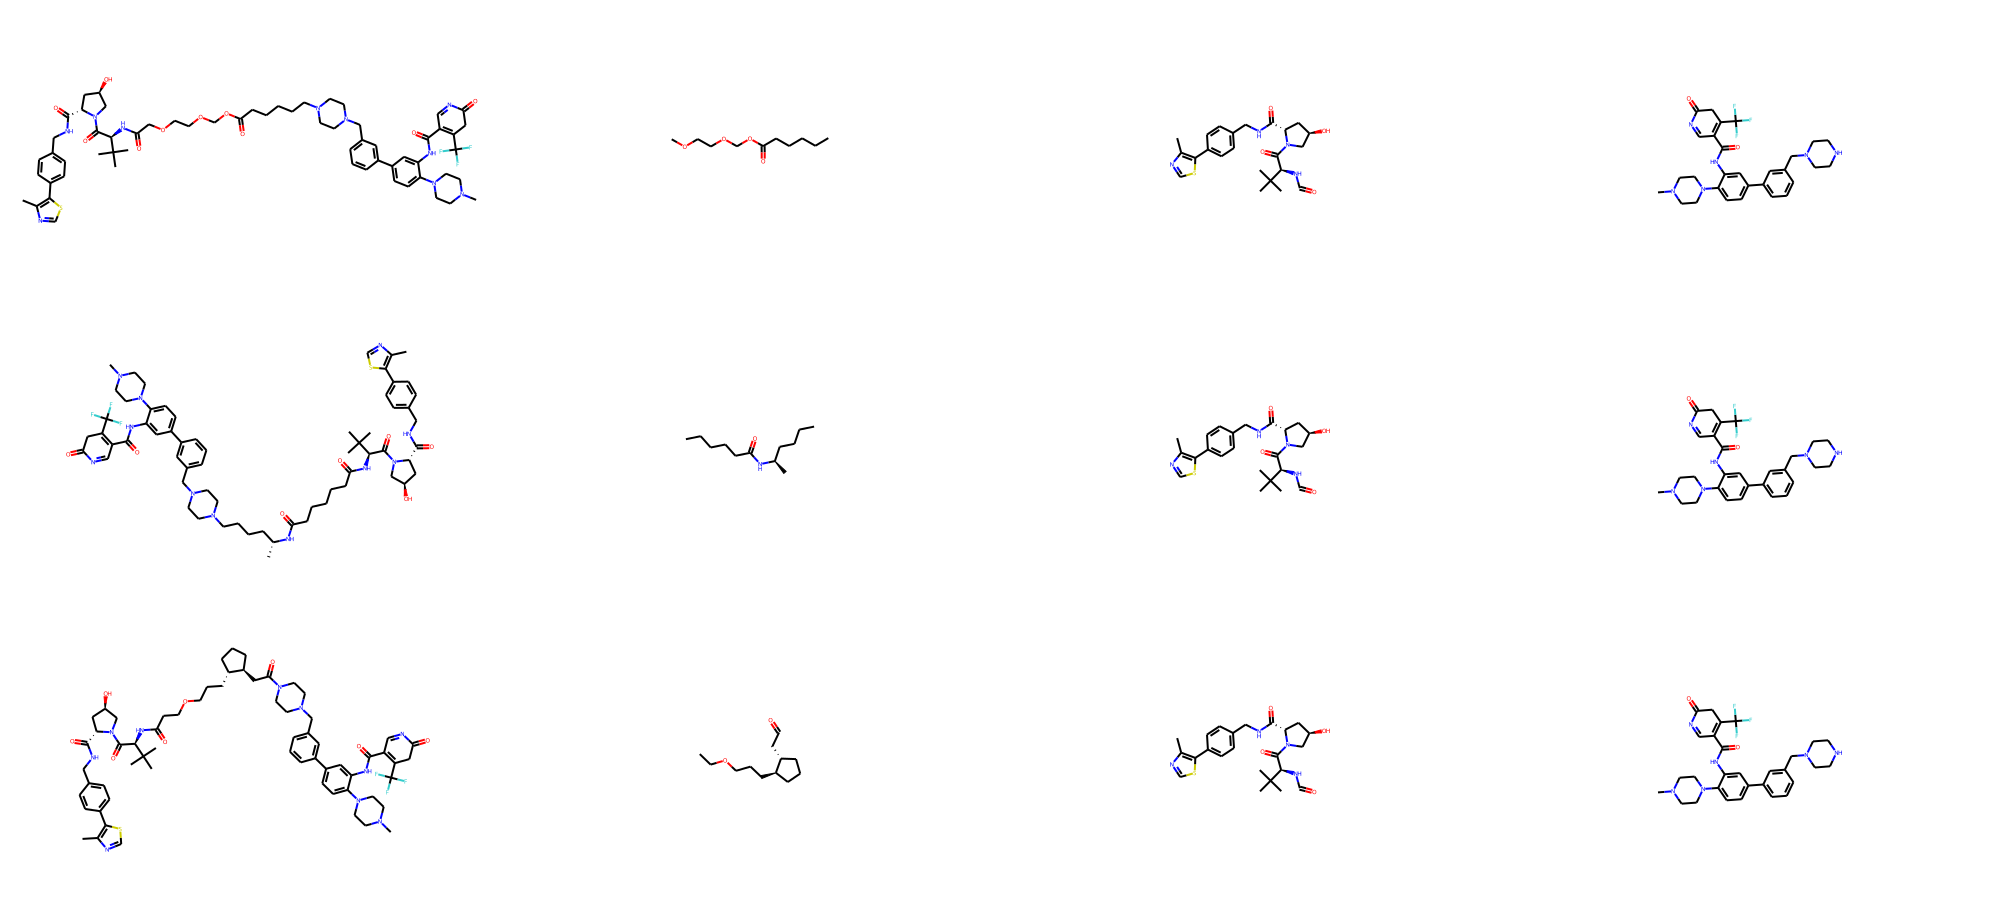

In [32]:
Chem.Draw.MolsToGridImage(mols[:], molsPerRow=4, subImgSize=(500,300))